# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df=pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

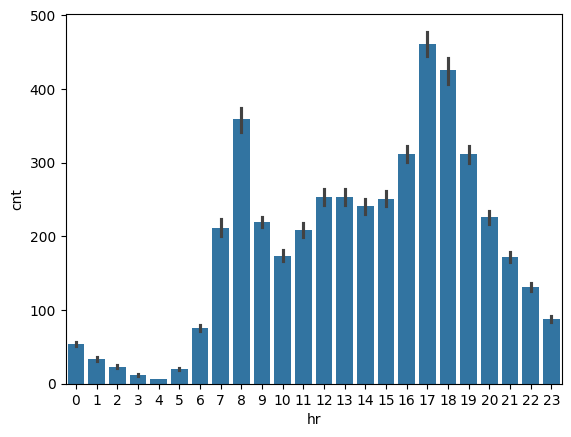

In [ ]:
# YOUR CODE HERE
sns.barplot(x='hr', y='cnt', data=df, estimator=np.mean)
plt.show()

#### Visualize the distribution of count, casual and registered variables

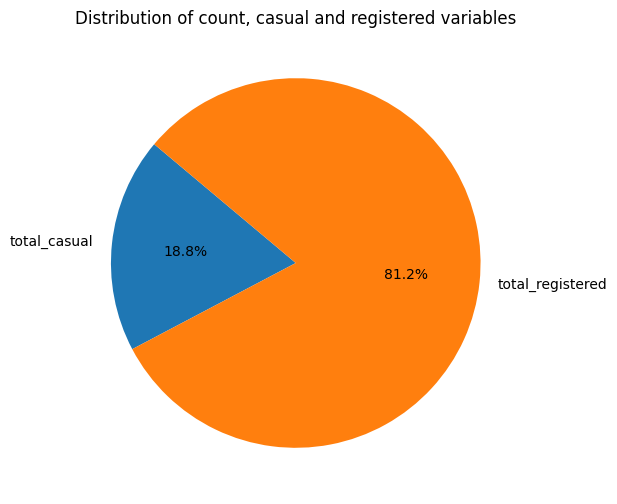

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
#total_cnt=df['cnt'].sum()
tota_casual=df['casual'].sum()
total_registered=df['registered'].sum()
values=[tota_casual, total_registered]
labels=['total_casual', 'total_registered']
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of count, casual and registered variables')
plt.show()

<ipython-input-159-5026c9c22fca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['casual'])


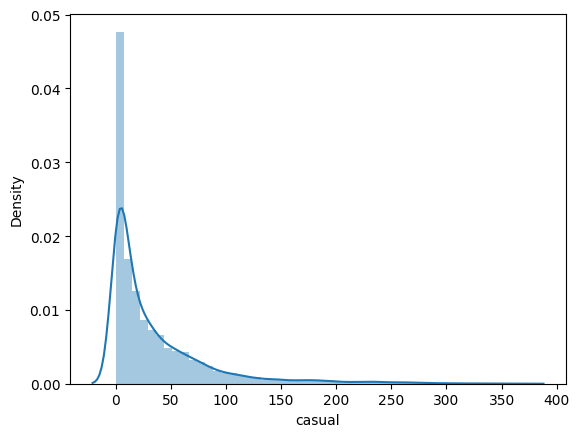

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
sns.distplot(df['casual'])
plt.show()

<ipython-input-160-b786b4c72848>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['registered'])


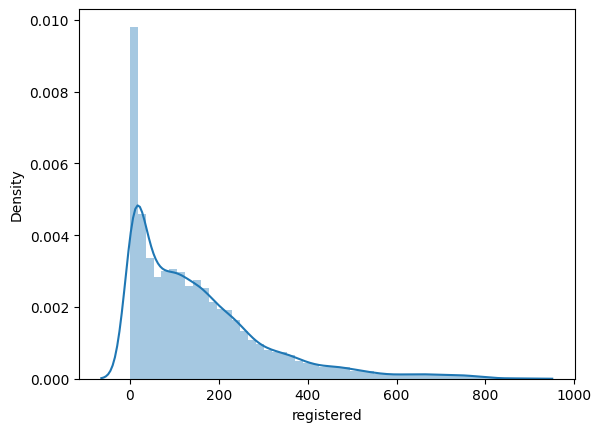

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
sns.distplot(df['registered'])
plt.show()

#### Describe the relation of weekday, holiday and working day

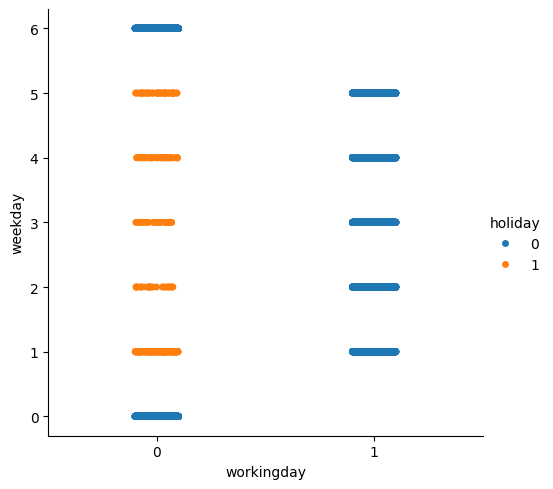

In [ ]:
# YOUR CODE HERE
sns.catplot(data=df, y='weekday', x='workingday', hue="holiday")

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

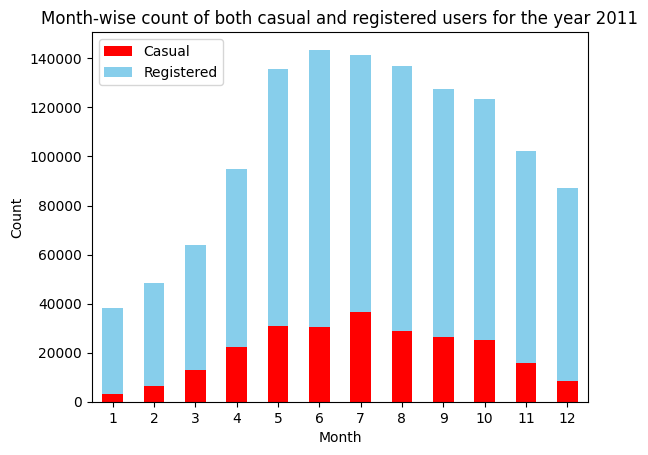

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
#date_2011 = df[df['dteday'].str.contains('2011')]
#date_2012 = df[df['dteday'].str.contains('2012')]
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]
df_monthly_2011 = df_2011.groupby('mnth')[['casual', 'registered']].sum()
ax = df_monthly_2011.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise count of both casual and registered users for the year 2011')
plt.legend(['Casual', 'Registered'], loc='upper left')
plt.xticks(range(12), range(1, 13), rotation=0)
plt.show()

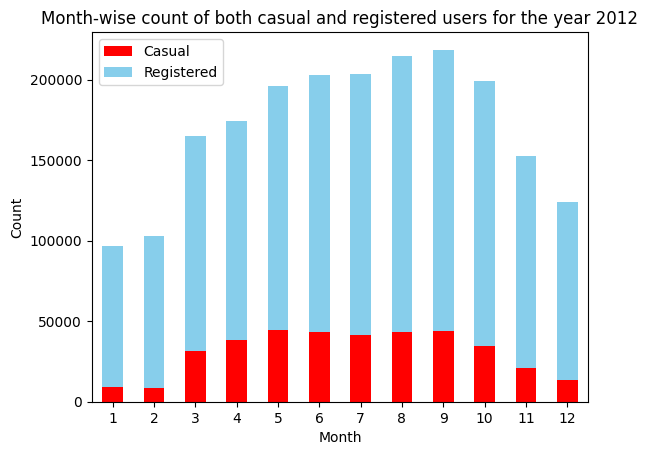

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_monthly_2012 = df_2012.groupby('mnth')[['casual', 'registered']].sum()
ax = df_monthly_2012.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise count of both casual and registered users for the year 2012')
plt.legend(['Casual', 'Registered'], loc='upper left')
plt.xticks(range(12), range(1, 13), rotation=0)
plt.show()

#### Analyze the correlation between features with heatmap

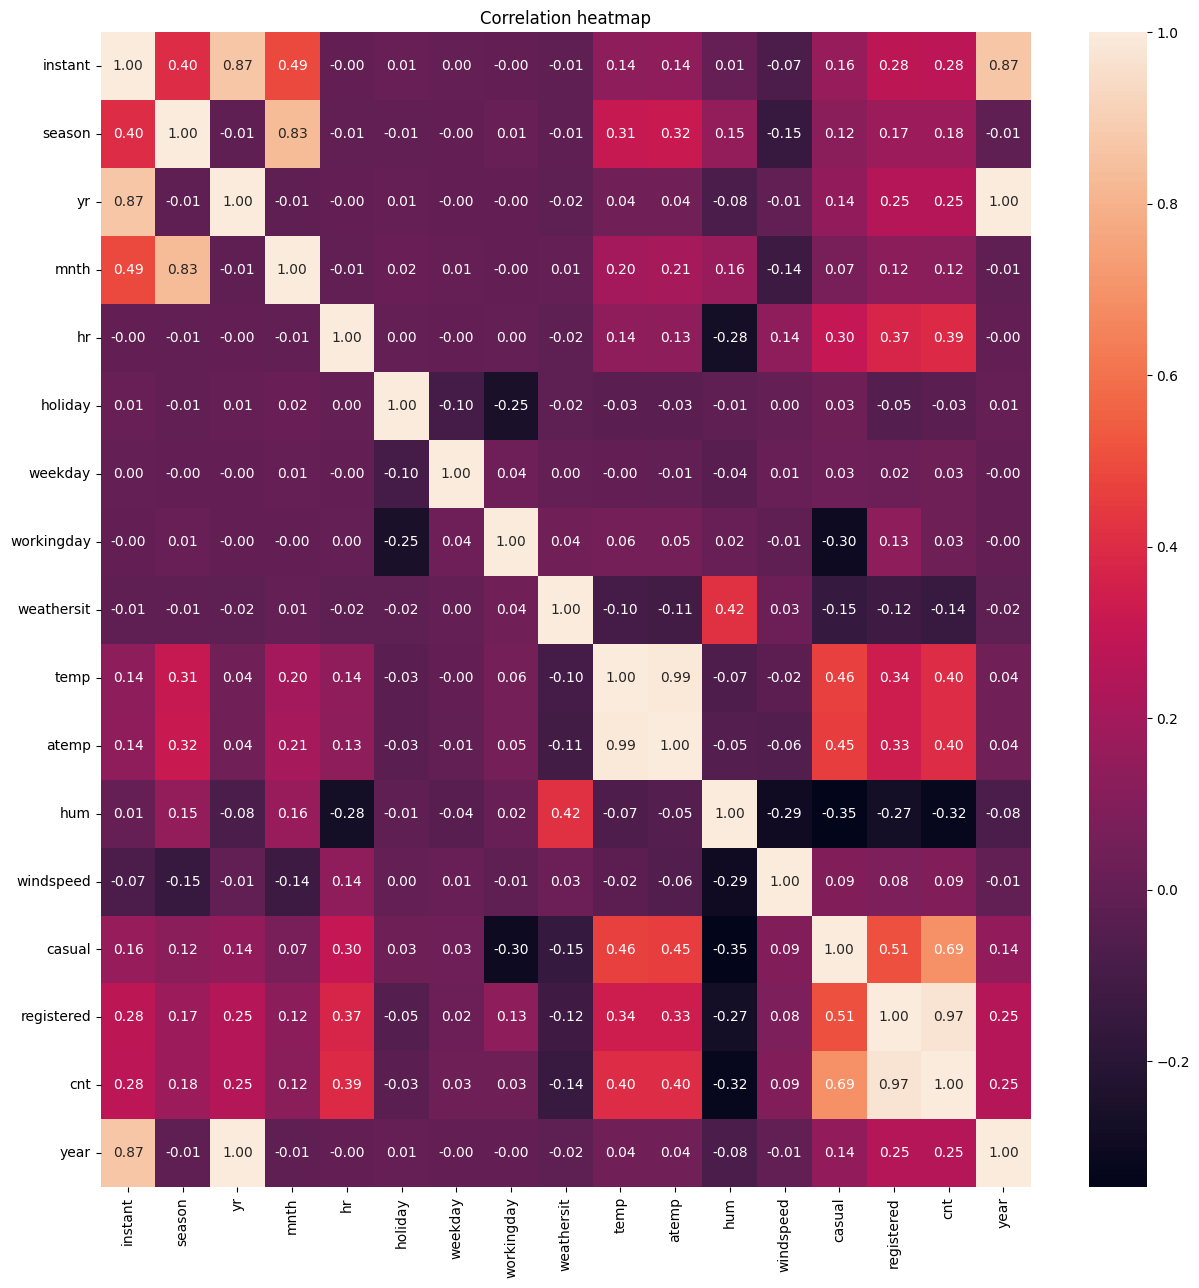

In [ ]:
# YOUR CODE HERE

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

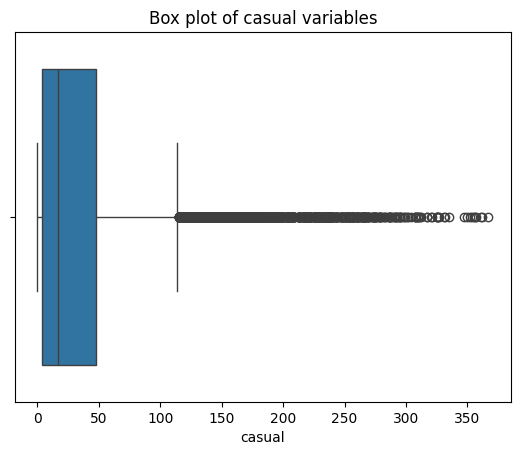

In [ ]:
# YOUR CODE HERE
sns.boxplot(x='casual', data=df)
plt.title('Box plot of casual variables')
plt.show()

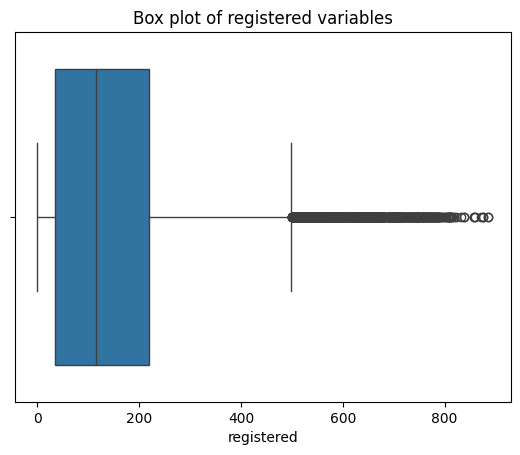

In [ ]:
# YOUR CODE HERE
sns.boxplot(x='registered', data=df)
plt.title('Box plot of registered variables')
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012


In [ ]:
# YOUR CODE HERE
columns_to_drop = ['dteday', 'instant','year']
df1=df.drop(columns_to_drop, axis=1)
df1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE

categorical_columns = df1.select_dtypes('int').columns.to_list()
target = ['cnt', 'casual', 'registered']
categorical_columns = [ele for ele in categorical_columns if ele not in target]
continuous_columns = df1.select_dtypes('float').columns.to_list()
categorical_columns, continuous_columns

print(categorical_columns)
print(continuous_columns)

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'atemp', 'hum', 'windspeed']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
scaler = StandardScaler()
df_scaled = df1.copy()
df_scaled[continuous_columns] = scaler.fit_transform(df[continuous_columns])
df_scaled.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,1.569989e-16,-1.831654e-16,-3.074562e-16,1.537281e-16,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553889e+00,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.153035e-01,-8.290895e-01,-7.631431e-01,-6.996886e-01,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.564696e-02,5.251758e-02,1.436398e-02,3.189880e-02,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.465975e-01,8.462549e-01,7.918711e-01,5.198962e-01,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.612367e+00,3.050563e+00,1.932215e+00,5.399871e+00,367.000000,886.000000,977.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
encoder = OneHotEncoder()
df_categorical_encoded = encoder.fit_transform(df_scaled[categorical_columns]).toarray()
df_categorical_encoded = pd.DataFrame(df_categorical_encoded)
df_categorical_encoded.columns = encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.concat([df_scaled, df_categorical_encoded], axis=1)
df_encoded.drop(categorical_columns, axis=1, inplace=True)
df_encoded

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,-1.093281,0.947372,-1.553889,3,13,16,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,-1.181732,0.895539,-1.553889,8,32,40,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.438516,-1.181732,0.895539,-1.553889,5,27,32,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.334648,-1.093281,0.636370,-1.553889,3,10,13,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.334648,-1.093281,0.636370,-1.553889,0,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.230779,-1.269602,-0.141137,-0.211691,11,108,119,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17375,-1.230779,-1.269602,-0.141137,-0.211691,8,81,89,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17376,-1.230779,-1.269602,-0.141137,-0.211691,7,83,90,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17377,-1.230779,-1.181732,-0.348473,-0.456099,13,48,61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
#After applying scaling and one-hot encoding, you need to separate your dataset into features (input variables) and targets (output variables) for machine learning tasks.
#Let's assume that the target variable is cnt (the total count of users). We will use all the other columns as features.

In [ ]:
# YOUR CODE HERE
#target_column = ['cnt', 'registered', 'casual']
target_column = ['cnt']
feature_columns = df_encoded.columns.drop(['cnt','casual','registered'])

# Separate features and target
X = df_encoded[feature_columns]
y = df_encoded[target_column]
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [ ]:
X.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

In [ ]:
X.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,-1.093281,0.947372,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.438516,-1.181732,0.895539,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.438516,-1.181732,0.895539,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.334648,-1.093281,0.636370,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.334648,-1.093281,0.636370,-1.553889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import ttest_ind
import statsmodels.api as sm
# Define function to calculate MAPE


# Add a column of ones to X_train for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculate theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Display the coefficients
#print("Coefficients (Normal Equation):", theta_best)

X_2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_predicted = np.dot(X_2, theta_best)
mean_squared_error(y_test, y_test_predicted, squared=False), r2_score(y_test, y_test_predicted), mean_absolute_percentage_error(y_test, y_test_predicted), model.f_pvalue



(11204.638546635495, -3963.7021675101346, 311.3402378323545, 0.0)

In [ ]:
import scipy

In [ ]:
sol, res, rank, s = scipy.linalg.lstsq(X_train, y_train)
y_test_predicted_lstsq = np.dot(X_test, sol)
mean_squared_error(y_test, y_test_predicted_lstsq, squared=False), r2_score(y_test, y_test_predicted_lstsq), mean_absolute_percentage_error(y_test, y_test_predicted_lstsq), model.f_pvalue

(100.4453410909724, 0.6813789519523497, 2.845147867459606, 0.0)

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(13903, 61)
(13903, 1)


In [ ]:
# Reshape y_train to be a 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

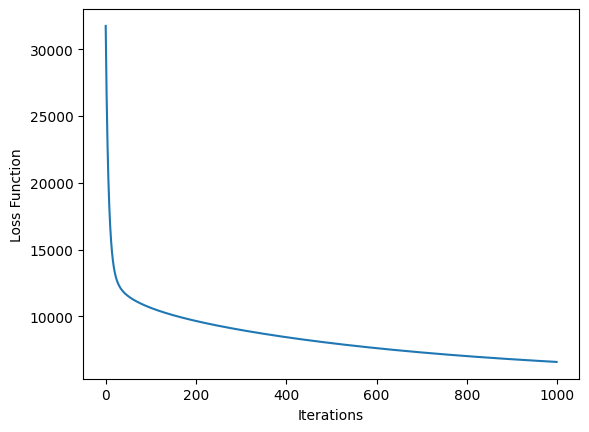

In [ ]:
# Gradient Descent Implementation

def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((np.dot(X, theta) - y) ** 2) / (2 * m)
    return J

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    loss_history = [0.0] * n_iterations
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(X_b.shape[1])  # Random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        loss = cost_function(X_b, y, theta)
        loss_history[iteration] = loss
    return theta, loss_history
theta_gd, loss_history = batch_gradient_descent(X_train, y_train)

X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_predicted = np.dot(X_2, theta_gd)
mean_squared_error(y_test, y_test_predicted, squared=False), r2_score(y_test, y_test_predicted), mean_absolute_percentage_error(y_test, y_test_predicted), model.f_pvalue

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss Function')
plt.show()

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# YOUR CODE HERE
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train, y_train)
theta_sgd = np.r_[sgd_reg.intercept_, sgd_reg.coef_]

y_test_predicted= sgd_reg.predict(X_test)
mean_squared_error(y_test, y_test_predicted, squared=False), r2_score(y_test, y_test_predicted), mean_absolute_percentage_error(y_test, y_test_predicted), model.f_pvalue



(100.49041297117355, 0.6810929442280542, 2.8104850242325976, 0.0)

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
# Linear Regression using sklearn
lin_reg = LinearRegression()
# When you use the fit method from sklearn's LinearRegression class, it calculates the coefficients (weights) for you. Here's a breakdown of what happens:
# This step calculates the coefficients (weights) that minimize the error between the predicted and actual target values. Internally, sklearn is using mathematical operations (like the normal equation or gradient descent) to find these coefficients.
lin_reg.fit(X_train, y_train)
# Predict the test data
#This step uses the calculated coefficients to predict the target values for the test data.
y_pred = lin_reg.predict(X_test)




In [ ]:
# Calculate error metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (MSE):", rmse)
mae = mean_absolute_percentage_error(y_test, y_test_predicted)
print("Mean Absolute % Error (MAE):", mae)

Root Mean Squared Error (MSE): 100.52776265410272
Mean Absolute % Error (MAE): 2.8104850242325976


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.6808558411933636


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

Text(0.5, 1.0, 'Feature Importance')

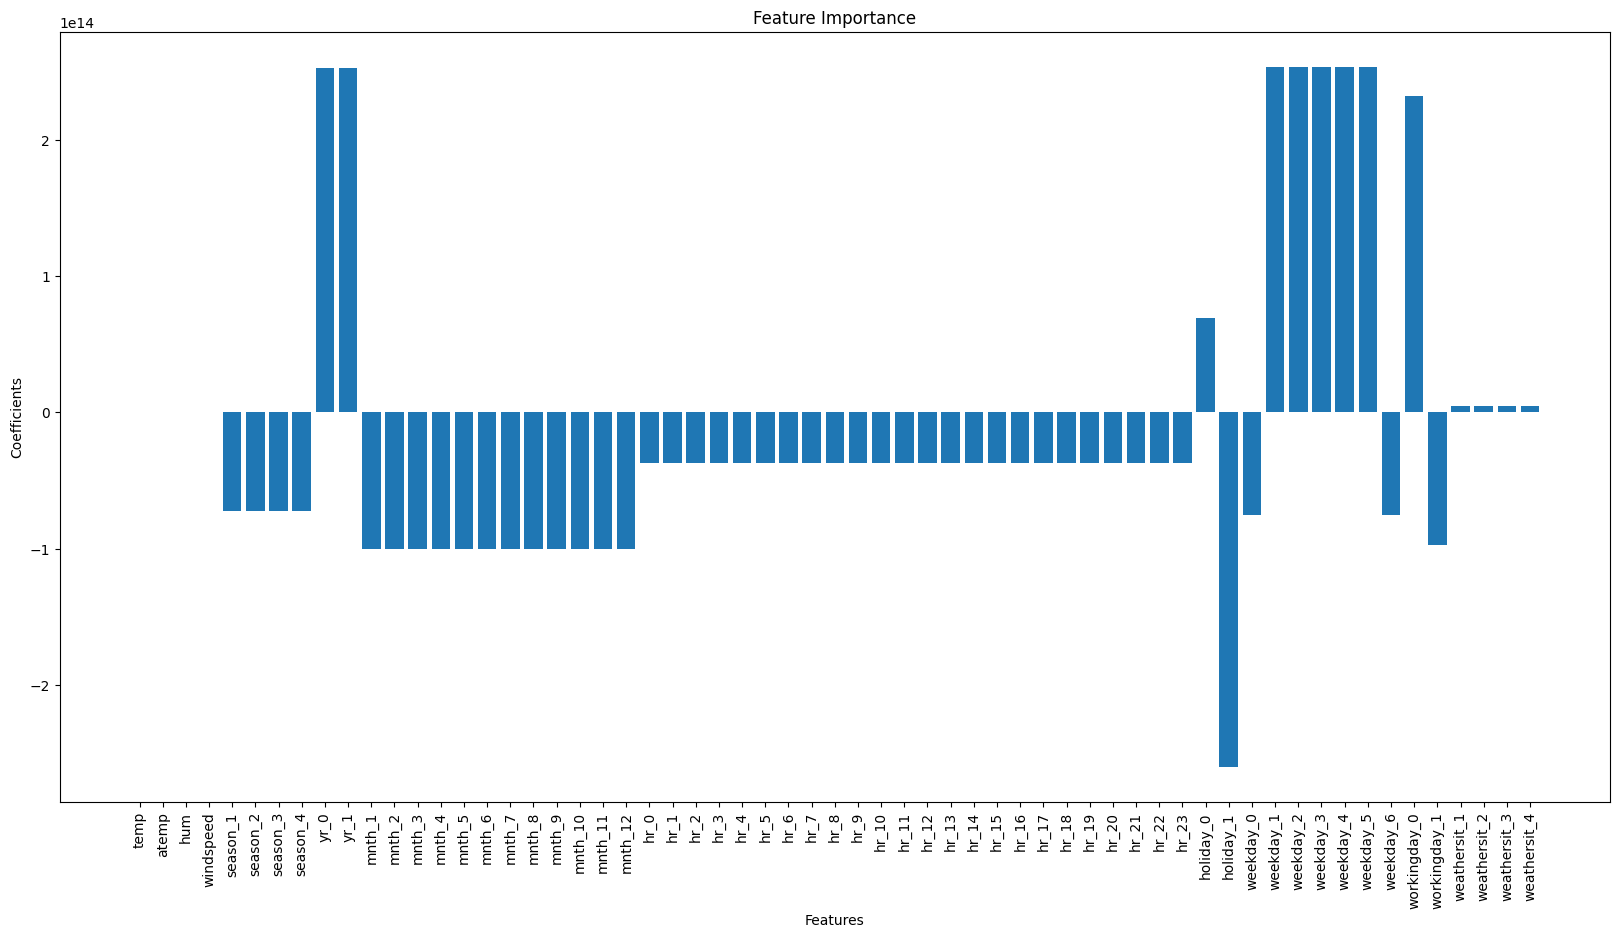

In [ ]:
# YOUR CODE HERE
coefficients = lin_reg.coef_
feature_names = X_train.columns
plt.figure(figsize=(20, 10))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.title('Feature Importance')


### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# When training a regularized model, finding the optimal alpha value is crucial for achieving the best performance. Using a range of alpha values allows us to
# perform hyperparameter tuning. By evaluating the model's performance over this range, we can select the alpha that provides the best balance
# between bias and variance for our specific dataset.

In [ ]:
# setting up alpha
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
# Initialize a dictionary to store results
results = {}

for alpha in alphas:
    # Initialize the Lasso model with the current alpha
    lasso = Lasso(alpha=alpha)

    # Fit the model on the training data
    lasso.fit(X_train, y_train)

    # Predict the test data
    y_pred = lasso.predict(X_test)

    # Calculate MSE and R²
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    #calculate MAE
    mae = mean_absolute_percentage_error(y_test, y_pred)

    # Store the results
    results[alpha] = {'MSE': mse, 'R²': r2}

    # Print the results for the current alpha
    print(f"Alpha: {alpha}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² (coefficient of determination): {r2}")
    print(f"Mean Absolute % Error (MAE): {mae}")
    #print(f"Coefficients: {lasso.coef_}")
    print('-'*30)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.667e+06, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.0001
Root Mean Squared Error (RMSE): 100.44538310338955
R² (coefficient of determination): 0.6813786854184709
Mean Absolute % Error (MAE): 2.844988386744137
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.579e+05, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001
Root Mean Squared Error (RMSE): 100.44058470503587
R² (coefficient of determination): 0.681409126548288
Mean Absolute % Error (MAE): 2.8446456345827142
------------------------------
Alpha: 0.01
Root Mean Squared Error (RMSE): 100.40414076451552
R² (coefficient of determination): 0.6816402801294328
Mean Absolute % Error (MAE): 2.840822889998015
------------------------------
Alpha: 0.1
Root Mean Squared Error (RMSE): 100.37365506682201
R² (coefficient of determination): 0.6818335778296347
Mean Absolute % Error (MAE): 2.8141162478252344
------------------------------
Alpha: 1
Root Mean Squared Error (RMSE): 103.56722738570976
R² (coefficient of determination): 0.6612653954059282
Mean Absolute % Error (MAE): 2.7390526872817973
------------------------------
Alpha: 10
Root Mean Squared Error (RMSE): 150.53944946430957
R² (coefficient of determination): 0.28432554991236547
Mean Absolute % Error (MAE): 5.190330965677939
------------------------------
Alpha: 100
Root Mean Square

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

In [ ]:
# List of alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Initialize a dictionary to store results
results = {}

for alpha in alphas:
    # Initialize the Ridge model with the current alpha
    ridge = Ridge(alpha=alpha)

    # Fit the model on the training data
    ridge.fit(X_train, y_train)

    # Predict the test data
    y_pred = ridge.predict(X_test)

    #calculate MAE
    mae = mean_absolute_percentage_error(y_test, y_pred)

    # Calculate MSE and R²
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[alpha] = {'MSE': mse, 'R²': r2}

    # Print the results for the current alpha
    print(f"Alpha: {alpha}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² (coefficient of determination): {r2}")
    print(f"Mean Absolute % Error (MAE): {mae}")
    #print(f"Coefficients: {ridge.coef_}")
    print('-'*30)

Alpha: 0.0001
Root Mean Squared Error (RMSE): 100.44594341416499
R² (coefficient of determination): 0.6813751307015041
Mean Absolute % Error (MAE): 2.8450236733955454
------------------------------
Alpha: 0.001
Root Mean Squared Error (RMSE): 100.44591803102948
R² (coefficient of determination): 0.6813752917373197
Mean Absolute % Error (MAE): 2.8450211322457633
------------------------------
Alpha: 0.01
Root Mean Squared Error (RMSE): 100.44566513858666
R² (coefficient of determination): 0.6813768961366016
Mean Absolute % Error (MAE): 2.8449957310021534
------------------------------
Alpha: 0.1
Root Mean Squared Error (RMSE): 100.44322612359082
R² (coefficient of determination): 0.6813923695189961
Mean Absolute % Error (MAE): 2.844742708824496
------------------------------
Alpha: 1
Root Mean Squared Error (RMSE): 100.42507402209104
R² (coefficient of determination): 0.6815075166659441
Mean Absolute % Error (MAE): 2.8422863939390073
------------------------------
Alpha: 10
Root Mean Sq

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet

In [ ]:
# List of alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Mixing parameter (0 means Lasso, 1 means Ridge)
l1_ratios = [0.1, 0.5, 0.7]

# Initialize a dictionary to store results
results = {}

for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Initialize the ElasticNet model with the current alpha and l1_ratio
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        # Fit the model on the training data
        elastic_net.fit(X_train, y_train)

        # Predict the test data
        y_pred = elastic_net.predict(X_test)

        #calculate MAE
        mae = mean_absolute_percentage_error(y_test, y_pred)

        # Calculate MSE and R²
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results[(alpha, l1_ratio)] = {'MSE': mse, 'R²': r2}

        # Print the results for the current alpha and l1_ratio
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        print(f"Root Mean Squared Error (MSE): {rmse}")
        print(f"R² (coefficient of determination): {r2}")
        print(f"Mean Absolute Error (MAE): {mae}")
       # print(f"Coefficients: {elastic_net.coef_}")
        print('-'*30)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.205e+07, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.0001, L1 Ratio: 0.1
Root Mean Squared Error (MSE): 100.42065453054309
R² (coefficient of determination): 0.6815355483876973
Mean Absolute Error (MAE): 2.841681675999184
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.980e+07, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.0001, L1 Ratio: 0.5
Root Mean Squared Error (MSE): 100.42906491285204
R² (coefficient of determination): 0.6814822023910445
Mean Absolute Error (MAE): 2.843136681288457
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.721e+07, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.0001, L1 Ratio: 0.7
Root Mean Squared Error (MSE): 100.43440230927911
R² (coefficient of determination): 0.6814483456398756
Mean Absolute Error (MAE): 2.843877857628122
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.172e+04, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001, L1 Ratio: 0.1
Root Mean Squared Error (MSE): 100.37138431192093
R² (coefficient of determination): 0.6818479734355275
Mean Absolute Error (MAE): 2.8186493235857832
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+05, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001, L1 Ratio: 0.5
Root Mean Squared Error (MSE): 100.38006351764565
R² (coefficient of determination): 0.6817929492611456
Mean Absolute Error (MAE): 2.828977785504457
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+07, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001, L1 Ratio: 0.7
Root Mean Squared Error (MSE): 100.39291947115638
R² (coefficient of determination): 0.6817114367202826
Mean Absolute Error (MAE): 2.8344518988884664
------------------------------
Alpha: 0.01, L1 Ratio: 0.1
Root Mean Squared Error (MSE): 102.3524837912269
R² (coefficient of determination): 0.6691648554025824
Mean Absolute Error (MAE): 2.8055658263584013
------------------------------
Alpha: 0.01, L1 Ratio: 0.5
Root Mean Squared Error (MSE): 101.0295587400059
R² (coefficient of determination): 0.6776617985237126
Mean Absolute Error (MAE): 2.784813517362572
------------------------------
Alpha: 0.01, L1 Ratio: 0.7
Root Mean Squared Error (MSE): 100.57749747209816
R² (coefficient of determination): 0.6805399781400141
Mean Absolute Error (MAE): 2.786368879868688
------------------------------
Alpha: 0.1, L1 Ratio: 0.1
Root Mean Squared Error (MSE): 125.3078537339366
R² (coefficient of determination): 0.504125872847017
Mean Absolute Error (MAE): 3.75147635794966

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# Determining MSE by using  (Casual, Registered)
target_column_1 = ['registered', 'casual']
feature_columns_1 = df_encoded.columns.drop(['cnt','casual','registered'])

# Separate features and target
X_1= df_encoded[feature_columns_1]
y_1 = df_encoded[target_column_1]
y_1.head()

,registered,casual
0,13,3
1,32,8
2,27,5
3,10,3
4,1,0


In [ ]:
# Split the dataset into training and test sets
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
print(X_1_train.shape)
print(y_1_train.shape)

(13903, 61)
(13903, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regression using sklearn
lin_reg = LinearRegression()
# When you use the fit method from sklearn's LinearRegression class, it calculates the coefficients (weights) for you. Here's a breakdown of what happens:
# This step calculates the coefficients (weights) that minimize the error between the predicted and actual target values. Internally, sklearn is using mathematical operations (like the normal equation or gradient descent) to find these coefficients.
lin_reg.fit(X_1_train, y_1_train)
# Predict the test data
#This step uses the calculated coefficients to predict the target values for the test data.
y_pred_1 = lin_reg.predict(X_1_test)

In [ ]:
# Calculate error metrics
# RMSE when keeping  squared=False
rmse_1 = mean_squared_error(y_1_test, y_pred_1, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_1)
mae_1 = mean_absolute_percentage_error(y_1_test, y_pred_1)
print("Mean Absolute % Error (MAE):", mae_1)

Root Mean Squared Error (RMSE): 57.78080535981466
Mean Absolute % Error (MAE): 4165114529918378.0


In [ ]:
# YOUR CODE HERE
r2_1= r2_score(y_1_test, y_pred_1)
print("R-squared (R²) Score:", r2_1)

R-squared (R²) Score: 0.6292750669001247


### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
